In [5]:
%matplotlib inline
from pathlib import Path

import sys

import qiime2
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# sys.path.append('/Users/alchemist/Aakash/Diet/gut_brain_project/pipeline_trail_version/dokdo/')
# import api
import statsmodels.api as sm
import scipy

from tempfile import mkdtemp
from qiime2 import Artifact

import matplotlib.pyplot as plt


pd.options.display.max_seq_items = 2000

Before beginning this tutorial, create a new directory and change to that directory.  
**make sure to change the path in `workdir`**

Input the variables below: 

In [7]:
workdir = !pwd
workdir = str(Path(workdir[0]).parents[0])
workdir

'/Users/alchemist/Aakash/BonnGut/Microbiome_pipeline'

## Sample metadata

### read  metadata into `qiime2.Metadata` object

In [8]:
sample_metadata    = qiime2.Metadata.load(workdir+'/metadata/metadata.tsv')
sample_metadata_pd = sample_metadata.to_dataframe()
sample_metadata_pd.head()

,barcode-sequence,body-site,year,month,day,subject,reported-antibiotic-usage,days-since-experiment-start
sample-id,,,,,,,,
L1S8,AGCTGACTAGTC,gut,2008.0,10.0,28.0,subject-1,Yes,0.0
L1S57,ACACACTATGGC,gut,2009.0,1.0,20.0,subject-1,No,84.0
L1S76,ACTACGTGTGGT,gut,2009.0,2.0,17.0,subject-1,No,112.0
L1S105,AGTGCGATGCGT,gut,2009.0,3.0,17.0,subject-1,No,140.0
L2S155,ACGATGCGACCA,left palm,2009.0,1.0,20.0,subject-1,No,84.0


## Loading Feature table

In [10]:
#
table                       = Artifact.load(workdir+'/feature_table/table.qza')
rep_seq                     = Artifact.load(workdir+'/rep_seq/rep_seq.qza')
phylogenic_tree_rooted_tree = Artifact.load(workdir+'/phylo_tree/rooted_tree.qza')
#
output_viz = feature_table.visualizers.summarize(table,sample_metadata) 
output_viz.visualization

ContextualVersionConflict: (numpy 1.19.4 (/Users/alchemist/anaconda3/envs/qiime2/lib/python3.6/site-packages), Requirement.parse('numpy<1.19.0,>=1.16.0'), {'tensorflow'})

## Alpha and beta diversity analysis

In [ ]:
phylogenic_tree_rooted_tree = Artifact.load(workdir+'/qza_files/rooted_tree.qza')

core_metrics = diversity.pipelines.core_metrics_phylogenetic(table = table,
                                                             phylogeny = phylogenic_tree_rooted_tree,
                                                             sampling_depth = 70000,
                                                             metadata = sample_metadata,
                                                             )

In [ ]:
observed_features_pd_group_significance = diversity.actions.alpha_group_significance(core_metrics.observed_features_vector,
                                                                           sample_metadata)
observed_features_pd_group_significance.visualization

In [8]:
shannon_pd_group_significance = diversity.actions.alpha_group_significance(core_metrics.shannon_vector,
                                                                           sample_metadata)
shannon_pd_group_significance.visualization

<visualization: Visualization uuid: 20193657-2193-45f0-9881-5fd13fb0f978>

In [ ]:
evenness_group_significance = diversity.actions.alpha_group_significance(core_metrics.evenness_vector,
                                                                         sample_metadata)
evenness_group_significance.visualization

In [9]:
faith_pd_group_significance = diversity.actions.alpha_group_significance(core_metrics.faith_pd_vector,
                                                                         sample_metadata)
faith_pd_group_significance.visualization

<visualization: Visualization uuid: e246468e-c788-4490-b54c-e29b4ab04ad2>

In [ ]:
pcoa_vis = plot(pcoa=core_metrics.bray_curtis_pcoa_results, metadata=sample_metadata)
pcoa_vis.visualization

In [ ]:
pcoa_vis = plot(pcoa=core_metrics.jaccard_pcoa_results, metadata=sample_metadata)
pcoa_vis.visualization

In [ ]:
pcoa_vis = plot(pcoa=core_metrics.unweighted_unifrac_pcoa_results, metadata=sample_metadata)
pcoa_vis.visualization

In [ ]:
pcoa_vis = plot(pcoa=core_metrics.weighted_unifrac_pcoa_results, metadata=sample_metadata)
pcoa_vis.visualization

In [ ]:
uUniFrac_beta_group_significance = diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix,
                                                                           sample_metadata.get_column('Group'),
                                                                                    pairwise=True,
                                                                          method = 'permanova')
uUniFrac_beta_group_significance.visualization

In [ ]:
uUniFrac_beta_group_significance = diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix,
                                                                           sample_metadata.get_column('Group'),
                                                                                    pairwise=True,
                                                                          method = 'permanova')
uUniFrac_beta_group_significance.visualization

In [ ]:
uUniFrac_beta_group_significance = diversity.actions.beta_group_significance(core_metrics.unweighted_unifrac_distance_matrix,
                                                                           sample_metadata.get_column('XXX'),
                                                                                    pairwise=True,
                                                                          method = 'permanova')
uUniFrac_beta_group_significance.visualization

In [ ]:
uUniFrac_beta_group_significance = diversity.actions.beta_group_significance(core_metrics.weighted_unifrac_distance_matrix,
                                                                           sample_metadata.get_column('XXX'),
                                                                                    pairwise=True,
                                                                          method = 'permanova')
uUniFrac_beta_group_significance.visualization

### Longitudinal_analysis

/Users/alchemist/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/q2_longitudinal/_utilities.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  individual_at_state_idx = group_md[_state & _ind].index


<visualization: Visualization uuid: 60ccedff-f4b3-43c6-84c6-a4452fba59c0>

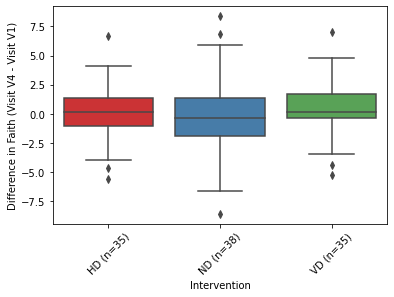

In [16]:

### Pairwise difference ###

uUniFrac_Supplement_Session_significance = longitudinal.visualizers.pairwise_differences(
                                              metadata = sample_metadata,
                                              metric = 'XXX',
                                              state_column = 'XXX',
                                              state_1 = 'X',
                                              state_2 = 'X',
                                              individual_id_column = 'Person_ID',
                                              group_column = 'XXX',
                                              parametric = True)
uUniFrac_Supplement_Session_significance.visualization

/Users/alchemist/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/q2_longitudinal/_utilities.py:116: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  individual_at_state_idx = group_md[_state & _ind].index


<visualization: Visualization uuid: 3c6f9e5b-1342-41ac-b032-abd71f602ace>

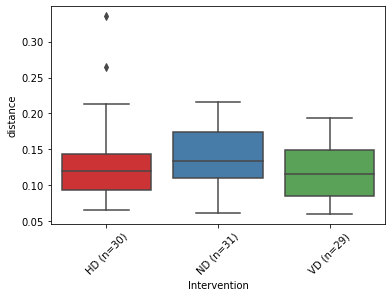

In [11]:

### Pairwise Distance ###

uUniFrac_Supplement_Session_significance = longitudinal.visualizers.pairwise_distances(
                                              distance_matrix = core_metrics.weighted_unifrac_distance_matrix,
                                              metadata = sample_metadata,
                                              state_column = 'XXX',
                                              state_1 = 'X',
                                              state_2 = 'VX4',
                                              individual_id_column = 'Person_ID',
                                              group_column = 'XXX',
                                              parametric = True)
uUniFrac_Supplement_Session_significance.visualization